In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [8]:
df = pd.read_csv('./house-data-set-cleaned-3.csv')

In [9]:
df.head()

,Unnamed: 0,Location,Price,Beds,Baths,House Size,Land Size
0,0,35,12500000,4,2,1750.0,6.5
1,1,25,29500000,4,4,3510.0,9.0
2,2,28,19000000,4,3,2850.0,7.5
3,3,25,35000000,7,4,1700.0,15.0
4,4,4,29500000,5,4,3500.0,8.0


In [10]:
df_X = df.drop(columns=['Unnamed: 0', 'Price'], axis=1)
df_Y = df['Price']
# df_X.head()
df_Y.head()

0    12500000
1    29500000
2    19000000
3    35000000
4    29500000
Name: Price, dtype: int64

In [11]:
X = df_X.values
Y = df_Y.values

In [12]:
X.shape

(7577, 5)

In [13]:
Y.shape

(7577,)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=42
)

In [15]:
model = RandomForestRegressor(n_jobs=-1)

19397188.702530373
19229131.692360535
19324570.189449925
18485488.31073526
19031284.588160664
18590137.623718325
19099829.27225656
19051799.479589403
18978315.203474697
18462060.937481284
19164571.585353315
18631965.233027715
18810613.19136961
18940629.64805128
18783372.332373574
18779404.62649174
18940724.214601155
18872652.47824969
18869692.814899847
18777919.60309966
18826888.75988966
18827191.414890736
18777849.381381273
18955956.292990867
18907185.99082189
18810969.10794491
18869121.6579172
18782714.203235477
18861382.843946837
19021706.513484478
18861884.76692104
18967055.78356281
18830906.24216027
18972295.07775701
18731852.742688794
18874994.285798453
18861214.06438279
18764893.61127395
18924715.408090208


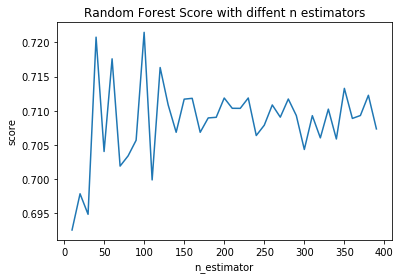

In [16]:
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    scores.append(model.score(X_test, Y_test))
    rmse= np.sqrt(((pred - Y_test) ** 2).mean())
    print(str(rmse))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores)

In [17]:
scores

[0.692553485316981,
 0.697857832768517,
 0.6948511911201193,
 0.7207752908651379,
 0.7040432839206511,
 0.7176048703767685,
 0.7019075592542776,
 0.7034048832613444,
 0.7056884517840368,
 0.7214825869044972,
 0.6998832581044532,
 0.716332668768501,
 0.7108668428220686,
 0.7068561299430108,
 0.711703661105875,
 0.7118254448032931,
 0.706853202725265,
 0.7089565175469257,
 0.7090477949321625,
 0.7118710190952997,
 0.7103662911097594,
 0.7103569789184372,
 0.7118731740597208,
 0.7063815174391028,
 0.707890430064496,
 0.7108559013120161,
 0.7090654080295427,
 0.7117238633244863,
 0.7093040017513731,
 0.7043411074533599,
 0.7092885300393981,
 0.7060375654197745,
 0.7102426676629131,
 0.7058751397471791,
 0.7132829876853215,
 0.7088842849753691,
 0.7093092042675131,
 0.7122706228926168,
 0.7073485319490237]

Scale the data -1 to 1

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

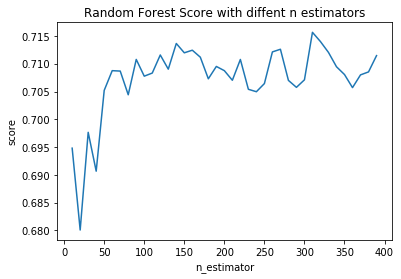

In [29]:
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores)

In [30]:
from sklearn.cluster import DBSCAN


In [31]:
db = DBSCAN(eps=3.0, min_samples=10).fit(X_train)
labels = db.labels_

In [32]:
pd.Series(labels).value_counts()

 0    5672
-1      10
dtype: int64

In [34]:
unique_labels = set(labels)
colors = ['blue', 'red']


In [35]:
unique_labels

{-1, 0}